# 05 Simple Linear Regression

Simple Linear Regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara satu variabel independen (fitur) dan satu variabel dependen (target). Tujuannya adalah untuk menemukan garis lurus yang paling sesuai dengan data, sehingga kita dapat memprediksi nilai target berdasarkan nilai fitur.

# Sample Data

In [31]:
import pandas as pd

pizza = {
    'diameter': [6, 8, 10, 14, 18],
    'price': [7, 9, 13, 17.5, 18],
}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


# Visualisasi Data

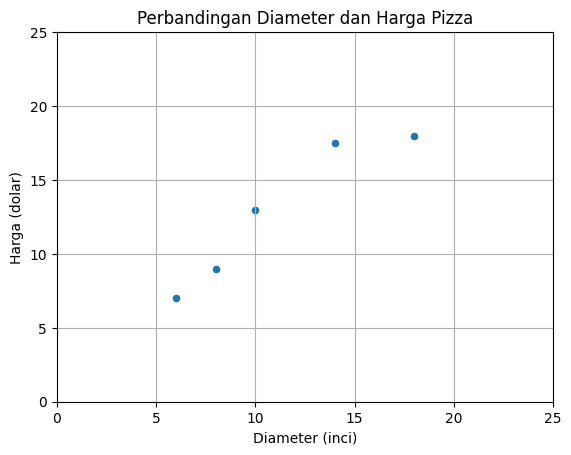

In [32]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='price')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inci)')
plt.ylabel('Harga (dolar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

# Penyesuaian Dataset

In [33]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['price'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [34]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [35]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

# Training Simple Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Visualisasi Simple Linear Regression Model

In [37]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

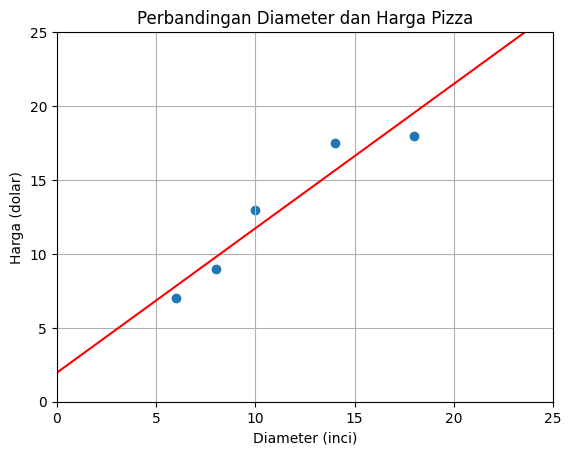

In [38]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inci)')
plt.ylabel('Harga (dolar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Formula Linear Regression: Y = a + bX
- Y: response variable (nilai yang diprediksi)
- X: explanatory variable (fitur)
- a: intercept (nilai y ketika x = 0)
- b: slope (kemiringan garis, menunjukkan perubahan y untuk setiap unit perubahan x)

In [39]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


# Mencari Nilai Slope

Nilai slope (kemiringan garis) menunjukkan seberapa besar perubahan pada variabel dependen (Y) untuk setiap unit perubahan pada variabel independen (X). Slope yang positif menunjukkan hubungan positif, sedangkan slope negatif menunjukkan hubungan negatif.

In [40]:
print(f'X: \n{X}\n')
print(f'X flatten: \n{X.flatten()}\n')
print(f'y: {y}')

X: 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: 
[ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


## Variance

In [41]:
variance_x = np.var(X.flatten(), ddof=1)
print(f'Variance X: {variance_x}')

Variance X: 23.2


## Covariance

In [42]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [43]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'Covariance X dan Y: {covariance_xy}')

Covariance X dan Y: 22.650000000000002


## Slope

In [44]:
slope = covariance_xy / variance_x
print(f'Slope: {slope}')

Slope: 0.976293103448276


# Mencari Nilai Intercept

Nilai intercept (a) adalah nilai Y ketika X = 0. Intercept memberikan informasi tentang titik potong garis regresi dengan sumbu Y.

In [45]:
intercept = np.mean(y) - slope * np.mean(X)
print(f'Intercept: {intercept}')

Intercept: 1.9655172413793096


# Prediksi Harga Pizza

In [46]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [47]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [48]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} inci, Harga: ${hrg}')

Diameter: [12] inci, Harga: $13.681034482758621
Diameter: [20] inci, Harga: $21.491379310344826
Diameter: [23] inci, Harga: $24.42025862068965


# Evaluasi Simple Linear Regression Model

## Training & Testing Dataset

In [49]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

## Training Simple Linear Regression Model

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluasi Linear Regression Model dengan Coefficient Determination atau R-Square (R²)

In [51]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


## Mencari nilai R-Square (R²)

In [52]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2 
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [53]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [54]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
